Kuis 1

Avifah Dwi Cahyani (2141720053)-TI3E

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
mnist = fetch_openml('mnist_784')
mnist.keys()

c:\Users\t470s\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# **No 1**
Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

Nilai per Label 0: 6903
Nilai per Label 1: 7877
Nilai per Label 2: 6990
Nilai per Label 3: 7141
Nilai per Label 4: 6824
Nilai per Label 5: 6313
Nilai per Label 6: 6876
Nilai per Label 7: 7293
Nilai per Label 8: 6825
Nilai per Label 9: 6958


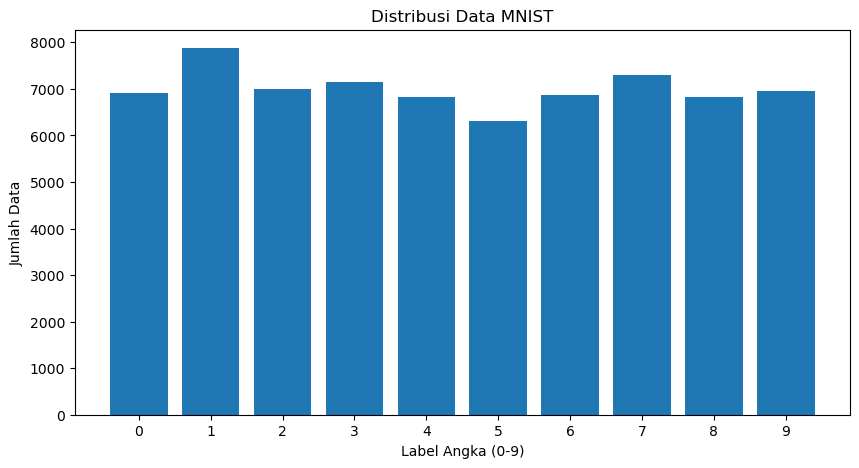

In [5]:
# Buat DataFrame dari dataset
df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df['label'] = mnist.target

# Hitung jumlah data untuk setiap label
label_counts = df['label'].value_counts().sort_index()

# Menampilkan jumlah data untuk setiap label (0-9)
for i in range(10):
    print(f"Nilai per Label {i}: {label_counts[i]}")
    
# Visualisasikan distribusi data
plt.figure(figsize=(10, 5))
plt.bar(label_counts.index.astype(int), label_counts.values)
plt.xlabel('Label Angka (0-9)')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Data MNIST')
plt.xticks(label_counts.index.astype(int))
plt.show()

Terdapat ketidakeimbangan data pada data MNIST. Oleh karena itu kami mencoba untuk menyeimbangkan data mnist menggunakan menggunakan metode oversampling

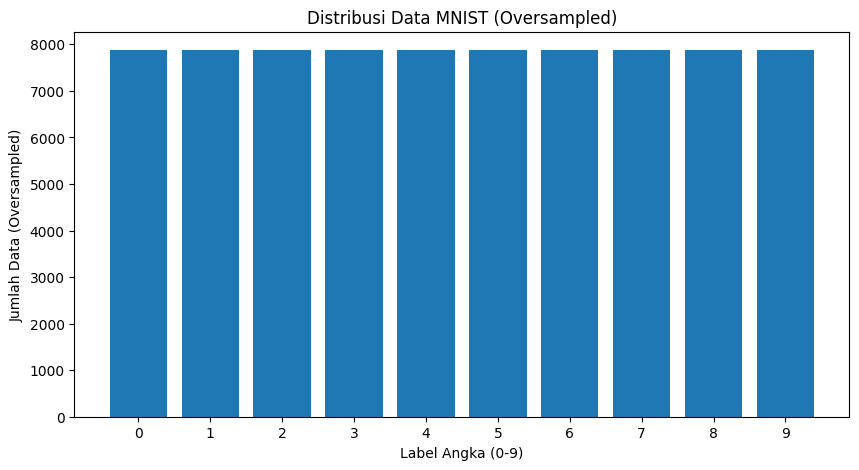

In [ ]:
# Buat DataFrame dari dataset
df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df['label'] = mnist.target

# Hitung jumlah data untuk setiap label
label_counts = df['label'].value_counts().sort_index()

# Tentukan jumlah sampel maksimum yang ingin Anda miliki
max_samples = label_counts.max()

# Oversampling untuk setiap label
oversampled_data = []
for label in label_counts.index:
    label_data = df[df['label'] == label]
    oversampled_label_data = resample(label_data, replace=True, n_samples=max_samples, random_state=42)
    oversampled_data.append(oversampled_label_data)

# Gabungkan kembali data yang telah di-oversampling
oversampled_df = pd.concat(oversampled_data)

# Visualisasikan distribusi data yang sudah seimbang
label_counts_oversampled = oversampled_df['label'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(label_counts_oversampled.index.astype(int), label_counts_oversampled.values)
plt.xlabel('Label Angka (0-9)')
plt.ylabel('Jumlah Data (Oversampled)')
plt.title('Distribusi Data MNIST (Oversampled)')
plt.xticks(label_counts.index.astype(int))
plt.show()

Di atas adalah hasil dari oversampling data. Kami memutuskan untuk menggunakan oversampling daripada undersampling karena kami tidak mau mengambil resiko untuk kehilangan data

# **No 2**
Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

Berikut adalah 15 citra pertama dari dada mnist

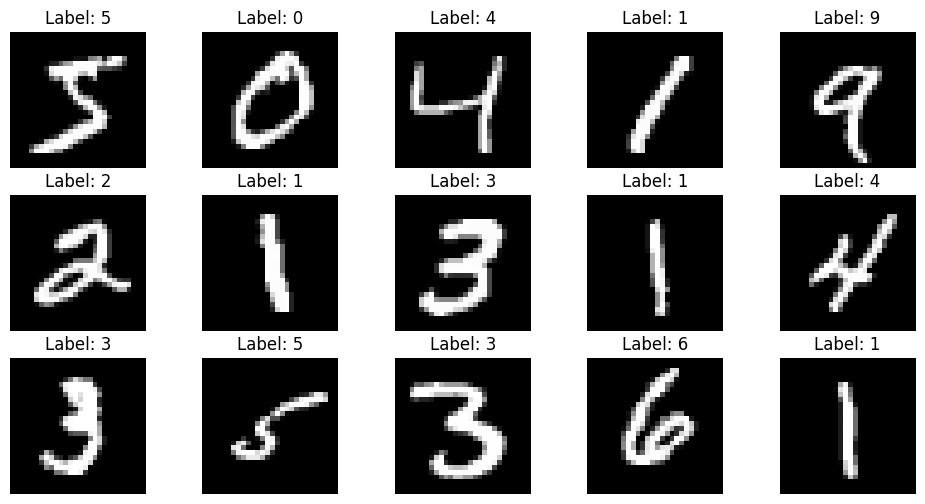

In [ ]:
# Mengambil 15 sampel pertama dari dataset
n = 15
X = mnist.data.to_numpy()[:n].reshape(-1, 28, 28).astype(int)
y = mnist.target.to_numpy()[:n]

# Menampilkan 15 gambar pertama berserta labelnya
plt.figure(figsize=(12, 6))
for i in range(n):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()

# **No 3**
Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

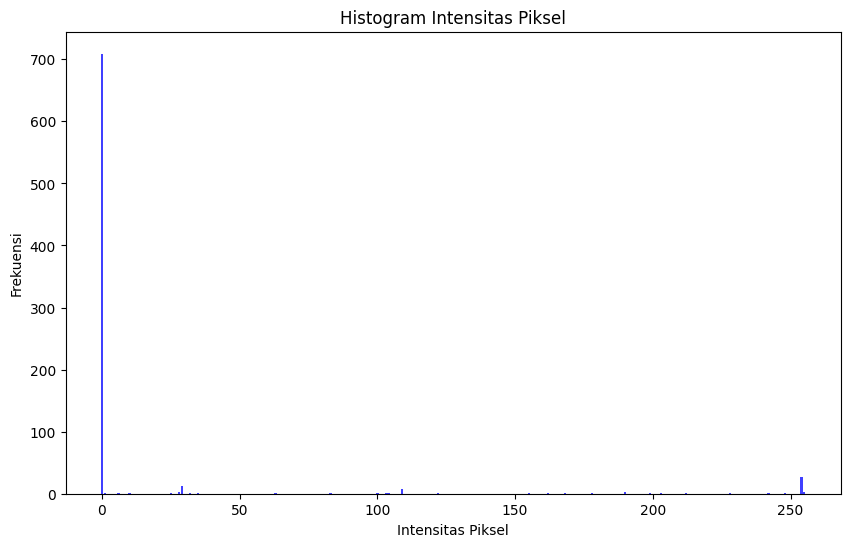

Intensitas Piksel 0: 618 kali
Intensitas Piksel 1: 2 kali
Intensitas Piksel 2: 3 kali
Intensitas Piksel 3: 1 kali
Intensitas Piksel 9: 1 kali
Intensitas Piksel 11: 3 kali
Intensitas Piksel 14: 1 kali
Intensitas Piksel 16: 2 kali
Intensitas Piksel 18: 5 kali
Intensitas Piksel 23: 1 kali
Intensitas Piksel 24: 1 kali
Intensitas Piksel 25: 1 kali
Intensitas Piksel 26: 1 kali
Intensitas Piksel 27: 1 kali
Intensitas Piksel 30: 1 kali
Intensitas Piksel 35: 1 kali
Intensitas Piksel 36: 1 kali
Intensitas Piksel 39: 2 kali
Intensitas Piksel 43: 1 kali
Intensitas Piksel 45: 1 kali
Intensitas Piksel 46: 1 kali
Intensitas Piksel 49: 1 kali
Intensitas Piksel 55: 1 kali
Intensitas Piksel 56: 1 kali
Intensitas Piksel 64: 2 kali
Intensitas Piksel 66: 1 kali
Intensitas Piksel 70: 1 kali
Intensitas Piksel 78: 1 kali
Intensitas Piksel 80: 2 kali
Intensitas Piksel 81: 2 kali
Intensitas Piksel 82: 2 kali
Intensitas Piksel 90: 1 kali
Intensitas Piksel 93: 2 kali
Intensitas Piksel 94: 1 kali
Intensitas Piksel

In [ ]:
# Mengambil gambar pertama dari dataset
citra_pertama = X[14].reshape(28, 28).astype(int)

# Menghitung histogram intensitas piksel
histogram = np.histogram(citra_pertama, bins=256, range=(0, 256))[0]

# Menampilkan histogram dengan peningkatan ukuran dan kecerahan
plt.figure(figsize=(10, 6))
plt.bar(range(256), histogram, alpha=0.75, color='b')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.title('Histogram Intensitas Piksel')
plt.show()

# Mengambil gambar pertama dari dataset
citra_pertama = X[0].reshape(28, 28).astype(int)

# Menghitung histogram intensitas piksel
histogram, bins = np.histogram(citra_pertama, bins=256, range=(0, 256))

# Menyaring intensitas piksel yang memiliki frekuensi lebih besar dari 0
intensitas_piksel = [i for i, freq in enumerate(histogram) if freq > 0]

# Menampilkan frekuensi yang tidak 0 sebagai teks
for i in intensitas_piksel:
    print(f'Intensitas Piksel {i}: {histogram[i]} kali')

Dapat dilihat bahwa piksel hitam lebih dominan daripada piksel putih

# **No 4**
Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data fitur (X) dan label (y)
X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

# Rasio 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Rasio 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Rasio 90:10
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)


Kami membagi data menjadi 70:30, 80:20, 90:10

## **No 5 dan No 6**

Klasifikasi dan Evaluasi menggunakan Naive Bayes

Akurasi Naive Bayes (70:30) Training: 0.8278979591836735

Classification Report Data Naive Bayes (70:30) Training:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      4845
           1       0.88      0.94      0.91      5513
           2       0.88      0.83      0.85      4857
           3       0.80      0.81      0.81      4965
           4       0.84      0.75      0.79      4888
           5       0.85      0.67      0.75      4398
           6       0.88      0.91      0.89      4788
           7       0.94      0.83      0.88      5045
           8       0.66      0.78      0.72      4833
           9       0.69      0.83      0.75      4868

    accuracy                           0.83     49000
   macro avg       0.83      0.83      0.83     49000
weighted avg       0.84      0.83      0.83     49000



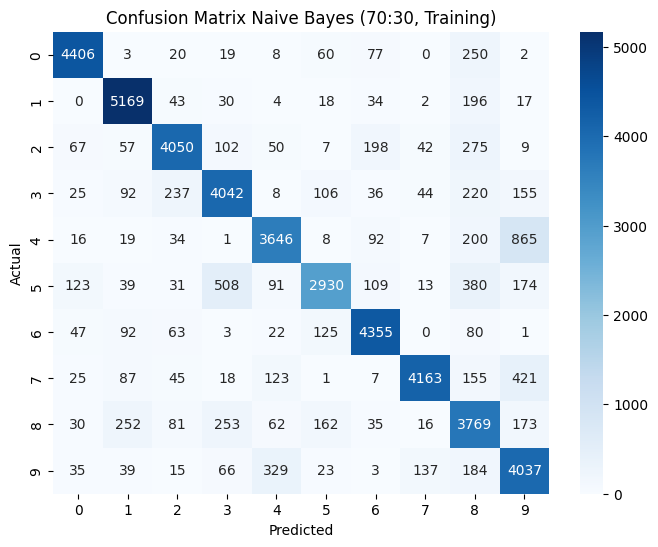


Akurasi Naive Bayes (70:30) Test: 0.8257142857142857

Classification Report Data Naive Bayes (70:30) Testing :
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      2058
           1       0.88      0.94      0.91      2364
           2       0.88      0.83      0.85      2133
           3       0.79      0.81      0.80      2176
           4       0.83      0.74      0.78      1936
           5       0.85      0.66      0.75      1915
           6       0.87      0.92      0.89      2088
           7       0.94      0.83      0.88      2248
           8       0.65      0.77      0.70      1992
           9       0.69      0.83      0.76      2090

    accuracy                           0.83     21000
   macro avg       0.83      0.82      0.82     21000
weighted avg       0.83      0.83      0.83     21000



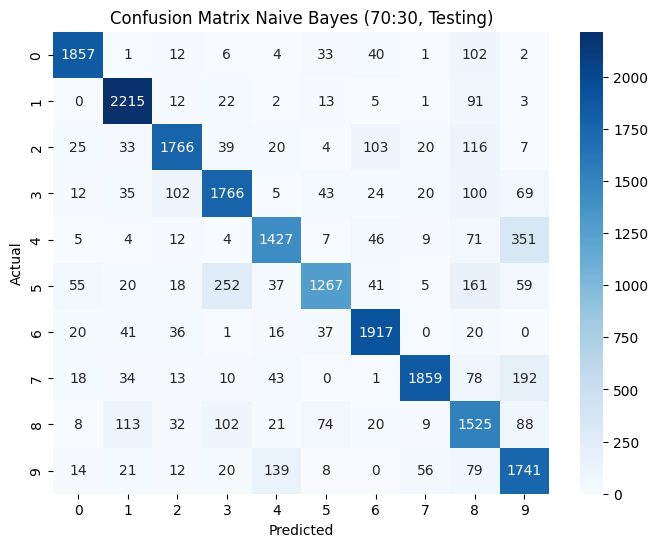


Akurasi Naive Bayes (80:20) Training: 0.8266785714285714

Classification Report Data Naive Bayes (80:20) Training :
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      5560
           1       0.89      0.94      0.91      6277
           2       0.88      0.83      0.86      5610
           3       0.80      0.81      0.80      5708
           4       0.84      0.74      0.79      5529
           5       0.85      0.66      0.74      5040
           6       0.88      0.91      0.89      5480
           7       0.94      0.83      0.88      5790
           8       0.65      0.77      0.71      5468
           9       0.69      0.83      0.75      5538

    accuracy                           0.83     56000
   macro avg       0.83      0.82      0.83     56000
weighted avg       0.83      0.83      0.83     56000



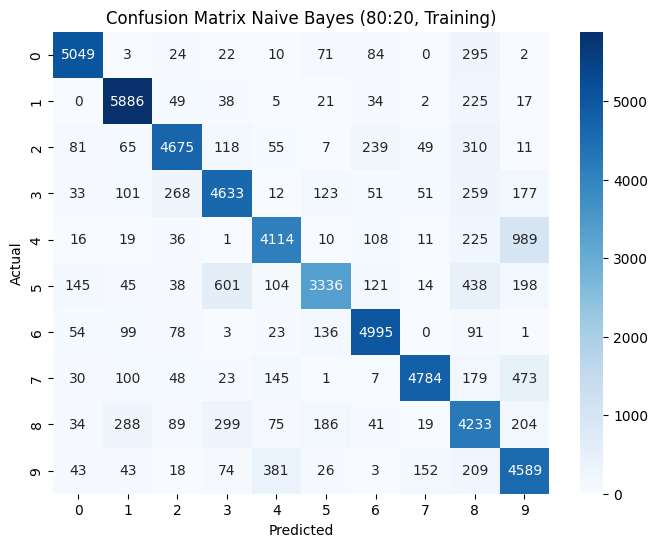


Akurasi Naive Bayes (80:20) Test: 0.829

Classification Report Data Naive Bayes (80:20) Testing :
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      1343
           1       0.88      0.94      0.90      1600
           2       0.88      0.83      0.85      1380
           3       0.80      0.82      0.81      1433
           4       0.84      0.74      0.78      1295
           5       0.86      0.67      0.75      1273
           6       0.88      0.91      0.90      1396
           7       0.94      0.83      0.88      1503
           8       0.67      0.78      0.72      1357
           9       0.70      0.84      0.76      1420

    accuracy                           0.83     14000
   macro avg       0.84      0.83      0.83     14000
weighted avg       0.84      0.83      0.83     14000



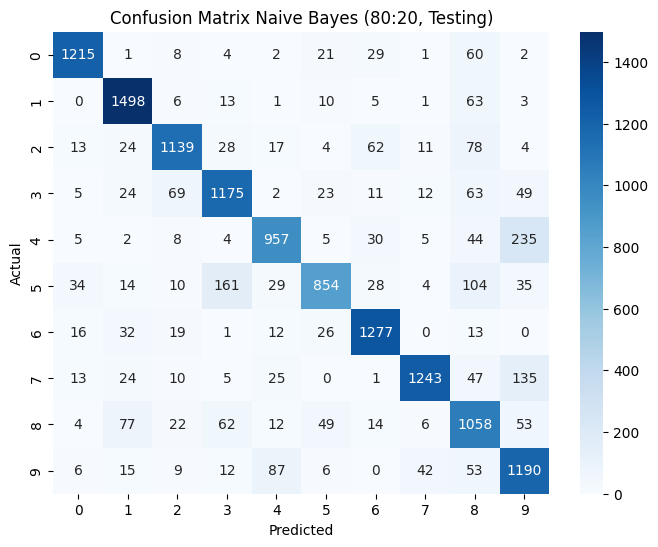


Akurasi Naive Bayes (90:10) Training: 0.8268412698412698

Classification Report Data Naive Bayes (90:10) Training :
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      6220
           1       0.89      0.94      0.91      7077
           2       0.88      0.83      0.86      6316
           3       0.80      0.81      0.81      6381
           4       0.84      0.74      0.79      6213
           5       0.85      0.66      0.74      5655
           6       0.88      0.91      0.90      6199
           7       0.94      0.83      0.88      6569
           8       0.66      0.78      0.71      6132
           9       0.69      0.83      0.75      6238

    accuracy                           0.83     63000
   macro avg       0.83      0.82      0.83     63000
weighted avg       0.83      0.83      0.83     63000



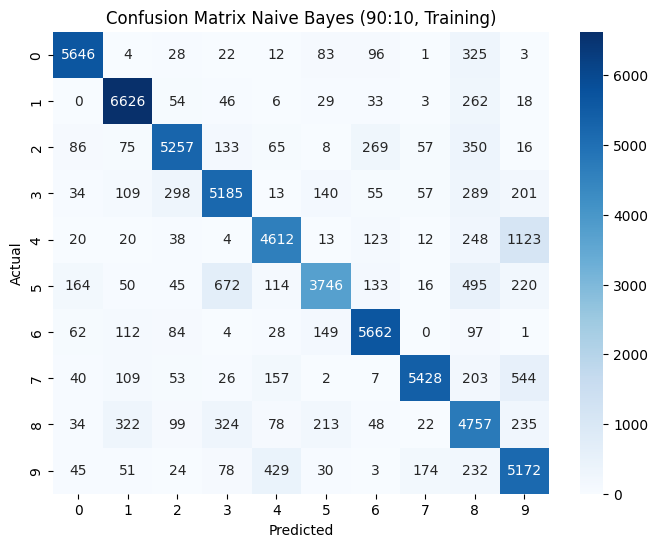


Akurasi Naive Bayes (90:10) Test: 0.8294285714285714

Classification Report Data Naive Bayes (90:10) Testing :
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       683
           1       0.86      0.94      0.90       800
           2       0.87      0.82      0.85       674
           3       0.79      0.82      0.81       760
           4       0.83      0.74      0.79       611
           5       0.88      0.69      0.77       658
           6       0.86      0.91      0.89       677
           7       0.95      0.82      0.88       724
           8       0.67      0.76      0.71       693
           9       0.72      0.85      0.78       720

    accuracy                           0.83      7000
   macro avg       0.84      0.83      0.83      7000
weighted avg       0.84      0.83      0.83      7000



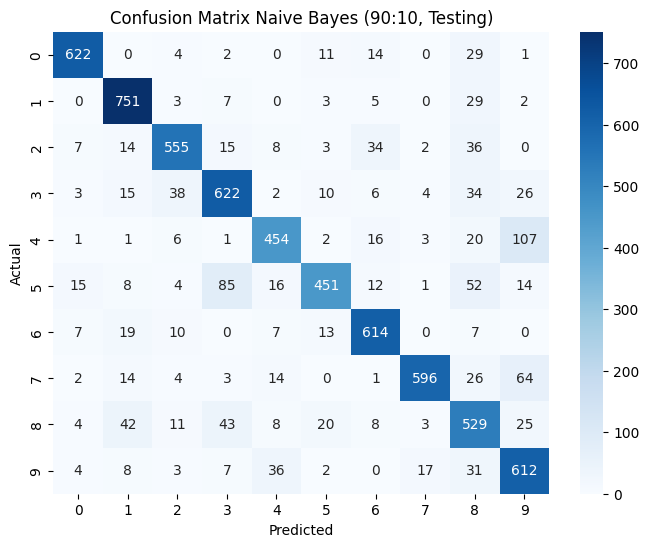

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi model Naive Bayes
naive_bayes = MultinomialNB()

# Fungsi untuk melakukan klasifikasi dan menghitung akurasi
def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

def classify_and_evaluate_train(X_train, X_test, y_train, y_test):
    naive_bayes.fit(X_train, y_train)
    y_pred_train = naive_bayes.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    classification_report_train = classification_report(y_train, y_pred_train)
    return acc_train, classification_report_train, y_pred_train

def classify_and_evaluate_test(X_train, X_test, y_train, y_test):
    naive_bayes.fit(X_train, y_train)
    y_pred_test = naive_bayes.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    classification_report_test = classification_report(y_test, y_pred_test)
    return acc_test, classification_report_test, y_pred_test

# Rasio 70:30
accuracy_70_train, cr_70_train, y_pred_train_70 = classify_and_evaluate_train(X_train_70, X_test_70, y_train_70, y_test_70)
accuracy_70_test, cr_70_test, y_pred_test_70 = classify_and_evaluate_test(X_train_70, X_test_70, y_train_70, y_test_70)

# Rasio 80:20
accuracy_80_train, cr_80_train, y_pred_train_80 = classify_and_evaluate_train(X_train_80, X_test_80, y_train_80, y_test_80)
accuracy_80_test, cr_80_test, y_pred_test_80 = classify_and_evaluate_test(X_train_80, X_test_80, y_train_80, y_test_80)

# Rasio 90:10
accuracy_90_train, cr_90_train, y_pred_train_90 = classify_and_evaluate_train(X_train_90, X_test_90, y_train_90, y_test_90)
accuracy_90_test, cr_90_test, y_pred_test_90 = classify_and_evaluate_test(X_train_90, X_test_90, y_train_90, y_test_90)

print("Akurasi Naive Bayes (70:30) Training:", accuracy_70_train)
print("\nClassification Report Data Naive Bayes (70:30) Training:\n", cr_70_train)
plot_confusion_matrix(y_train_70, y_pred_train_70, labels=sorted(set(y_train_70)), title="Confusion Matrix Naive Bayes (70:30, Training)")
print("\nAkurasi Naive Bayes (70:30) Test:", accuracy_70_test)
print("\nClassification Report Data Naive Bayes (70:30) Testing :\n", cr_70_test)
plot_confusion_matrix(y_test_70, y_pred_test_70, labels=sorted(set(y_test_70)), title="Confusion Matrix Naive Bayes (70:30, Testing)")
print("\nAkurasi Naive Bayes (80:20) Training:", accuracy_80_train)
print("\nClassification Report Data Naive Bayes (80:20) Training :\n", cr_80_train)
plot_confusion_matrix(y_train_80, y_pred_train_80, labels=sorted(set(y_train_80)), title="Confusion Matrix Naive Bayes (80:20, Training)")
print("\nAkurasi Naive Bayes (80:20) Test:", accuracy_80_test)
print("\nClassification Report Data Naive Bayes (80:20) Testing :\n", cr_80_test)
plot_confusion_matrix(y_test_80, y_pred_test_80, labels=sorted(set(y_test_80)), title="Confusion Matrix Naive Bayes (80:20, Testing)")
print("\nAkurasi Naive Bayes (90:10) Training:", accuracy_90_train)
print("\nClassification Report Data Naive Bayes (90:10) Training :\n", cr_90_train)
plot_confusion_matrix(y_train_90, y_pred_train_90, labels=sorted(set(y_train_90)), title="Confusion Matrix Naive Bayes (90:10, Training)")
print("\nAkurasi Naive Bayes (90:10) Test:", accuracy_90_test)
print("\nClassification Report Data Naive Bayes (90:10) Testing :\n", cr_90_test)
plot_confusion_matrix(y_test_90, y_pred_test_90, labels=sorted(set(y_test_90)), title="Confusion Matrix Naive Bayes (90:10, Testing)")

Klasifikasi dan Evaluasi Menggunakan Metode SVM

Akurasi SVM (70:30) Training: 0.989204081632653

Classification Report Data SVM (70:30) Training:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4845
           1       0.99      0.99      0.99      5513
           2       0.99      0.99      0.99      4857
           3       0.99      0.99      0.99      4965
           4       0.99      0.99      0.99      4888
           5       0.99      0.99      0.99      4398
           6       0.99      0.99      0.99      4788
           7       0.99      0.99      0.99      5045
           8       0.99      0.99      0.99      4833
           9       0.99      0.98      0.98      4868

    accuracy                           0.99     49000
   macro avg       0.99      0.99      0.99     49000
weighted avg       0.99      0.99      0.99     49000



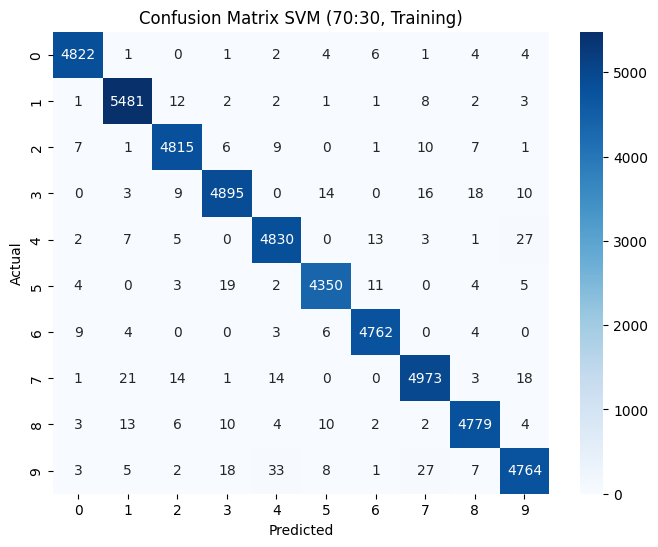

Akurasi SVM (70:30) Test: 0.9762857142857143

Classification Report Data SVM (70:30) Test:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0.98      0.97      2133
           3       0.97      0.97      0.97      2176
           4       0.97      0.98      0.97      1936
           5       0.98      0.97      0.97      1915
           6       0.98      0.99      0.99      2088
           7       0.97      0.97      0.97      2248
           8       0.98      0.96      0.97      1992
           9       0.97      0.96      0.97      2090

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



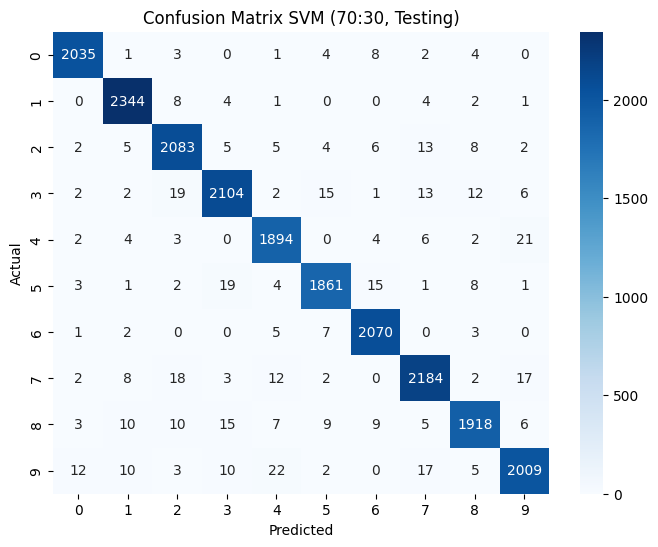

Akurasi SVM (80:20) Training: 0.9899464285714286

Classification Report Data SVM (80:20) Training:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5560
           1       0.99      0.99      0.99      6277
           2       0.99      0.99      0.99      5610
           3       0.99      0.99      0.99      5708
           4       0.99      0.99      0.99      5529
           5       0.99      0.99      0.99      5040
           6       0.99      0.99      0.99      5480
           7       0.99      0.99      0.99      5790
           8       0.99      0.99      0.99      5468
           9       0.98      0.98      0.98      5538

    accuracy                           0.99     56000
   macro avg       0.99      0.99      0.99     56000
weighted avg       0.99      0.99      0.99     56000



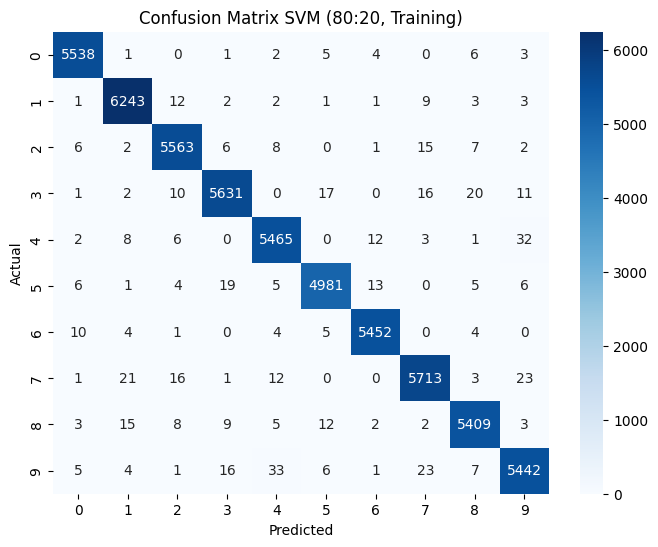

Akurasi SVM (80:20) Test: 0.9764285714285714

Classification Report Data SVM (80:20) Test:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



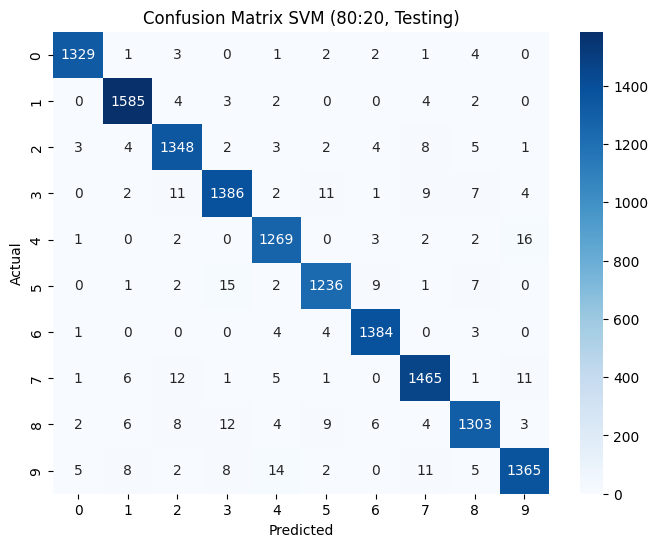

Akurasi SVM (90:10) Training: 0.9902222222222222

Classification Report Data SVM (90:20) Training:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6220
           1       0.99      1.00      0.99      7077
           2       0.99      0.99      0.99      6316
           3       0.99      0.99      0.99      6381
           4       0.99      0.99      0.99      6213
           5       0.99      0.99      0.99      5655
           6       0.99      1.00      0.99      6199
           7       0.99      0.99      0.99      6569
           8       0.99      0.99      0.99      6132
           9       0.99      0.98      0.98      6238

    accuracy                           0.99     63000
   macro avg       0.99      0.99      0.99     63000
weighted avg       0.99      0.99      0.99     63000



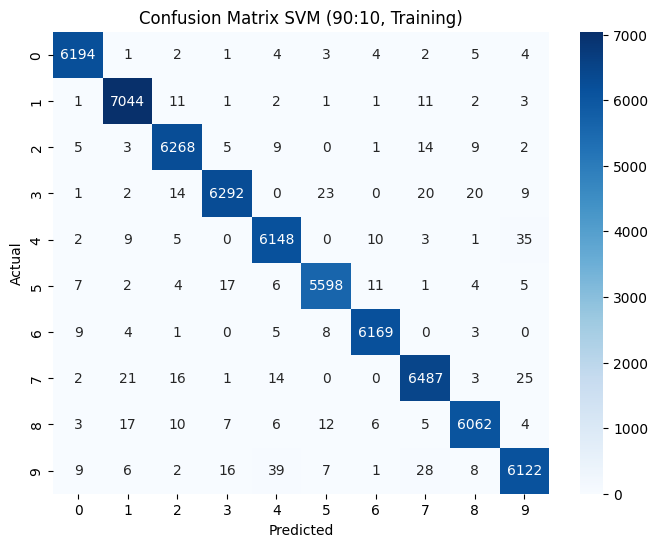

Akurasi SVM (90:10) Test: 0.975

Classification Report Data SVM (90:20) Test:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       683
           1       0.98      0.99      0.99       800
           2       0.96      0.98      0.97       674
           3       0.97      0.96      0.96       760
           4       0.97      0.98      0.98       611
           5       0.98      0.97      0.97       658
           6       0.98      0.99      0.98       677
           7       0.97      0.97      0.97       724
           8       0.98      0.96      0.97       693
           9       0.97      0.97      0.97       720

    accuracy                           0.97      7000
   macro avg       0.97      0.98      0.98      7000
weighted avg       0.97      0.97      0.97      7000



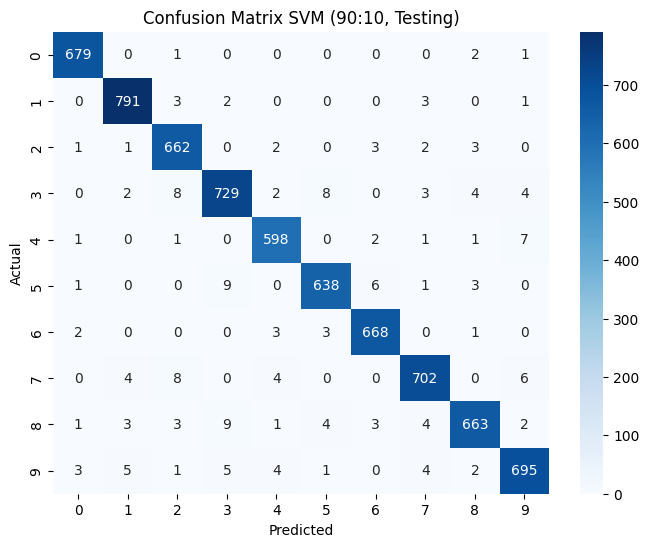

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi model SVM dengan kernel rbf
svm_rbf = SVC(kernel='rbf')

# Fungsi untuk melakukan klasifikasi dan menghitung akurasi
def classify_and_evaluate_train_svm(X_train, X_test, y_train, y_test):
    svm_rbf.fit(X_train, y_train)
    y_pred_train = svm_rbf.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    classification_report_train = classification_report(y_train, y_pred_train)
    return acc_train, classification_report_train, y_pred_train

def classify_and_evaluate_test_svm(X_train, X_test, y_train, y_test):
    svm_rbf.fit(X_train, y_train)
    y_pred_test = svm_rbf.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    classification_report_test = classification_report(y_test, y_pred_test)
    return acc_test, classification_report_test, y_pred_test

def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Klasifikasi SVM pada rasio 70:30
accuracy_svm_70_train, cr_svm_70_train, y_pred_train_70_svm = classify_and_evaluate_train_svm(X_train_70, X_test_70, y_train_70, y_test_70)
accuracy_svm_70_test, cr_svm_70_test, y_pred_test_70_svm = classify_and_evaluate_test_svm(X_train_70, X_test_70, y_train_70, y_test_70)

# Klasifikasi SVM pada rasio 80:20
accuracy_svm_80_train, cr_svm_80_train, y_pred_train_80_svm = classify_and_evaluate_train_svm(X_train_80, X_test_80, y_train_80, y_test_80)
accuracy_svm_80_test, cr_svm_80_test, y_pred_test_80_svm = classify_and_evaluate_test_svm(X_train_80, X_test_80, y_train_80, y_test_80)

# Klasifikasi SVM pada rasio 90:10
accuracy_svm_90_train, cr_svm_90_train, y_pred_train_90_svm = classify_and_evaluate_train_svm(X_train_90, X_test_90, y_train_90, y_test_90)
accuracy_svm_90_test, cr_svm_90_test, y_pred_test_90_svm = classify_and_evaluate_test_svm(X_train_90, X_test_90, y_train_90, y_test_90)

print("Akurasi SVM (70:30) Training:", accuracy_svm_70_train)
print("\nClassification Report Data SVM (70:30) Training:\n", cr_svm_70_train)
plot_confusion_matrix(y_train_70, y_pred_train_70_svm, labels=sorted(set(y_train_70)), title="Confusion Matrix SVM (70:30, Training)")
print("Akurasi SVM (70:30) Test:", accuracy_svm_70_test)
print("\nClassification Report Data SVM (70:30) Test:\n", cr_svm_70_test)
plot_confusion_matrix(y_test_70, y_pred_test_70_svm, labels=sorted(set(y_test_70)), title="Confusion Matrix SVM (70:30, Testing)")
print("Akurasi SVM (80:20) Training:", accuracy_svm_80_train)
print("\nClassification Report Data SVM (80:20) Training:\n", cr_svm_80_train)
plot_confusion_matrix(y_train_80, y_pred_train_80_svm, labels=sorted(set(y_train_80)), title="Confusion Matrix SVM (80:20, Training)")
print("Akurasi SVM (80:20) Test:", accuracy_svm_80_test)
print("\nClassification Report Data SVM (80:20) Test:\n", cr_svm_80_test)
plot_confusion_matrix(y_test_80, y_pred_test_80_svm, labels=sorted(set(y_test_80)), title="Confusion Matrix SVM (80:20, Testing)")
print("Akurasi SVM (90:10) Training:", accuracy_svm_90_train)
print("\nClassification Report Data SVM (90:20) Training:\n", cr_svm_90_train)
plot_confusion_matrix(y_train_90, y_pred_train_90_svm, labels=sorted(set(y_train_90)), title="Confusion Matrix SVM (90:10, Training)")
print("Akurasi SVM (90:10) Test:", accuracy_svm_90_test)
print("\nClassification Report Data SVM (90:20) Test:\n", cr_svm_90_test)
plot_confusion_matrix(y_test_90, y_pred_test_90_svm, labels=sorted(set(y_test_90)), title="Confusion Matrix SVM (90:10, Testing)")

Akurasi menggunakan SVM lebih tinggi daripada menggunakan Naive Bayes

## **No 7**
Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

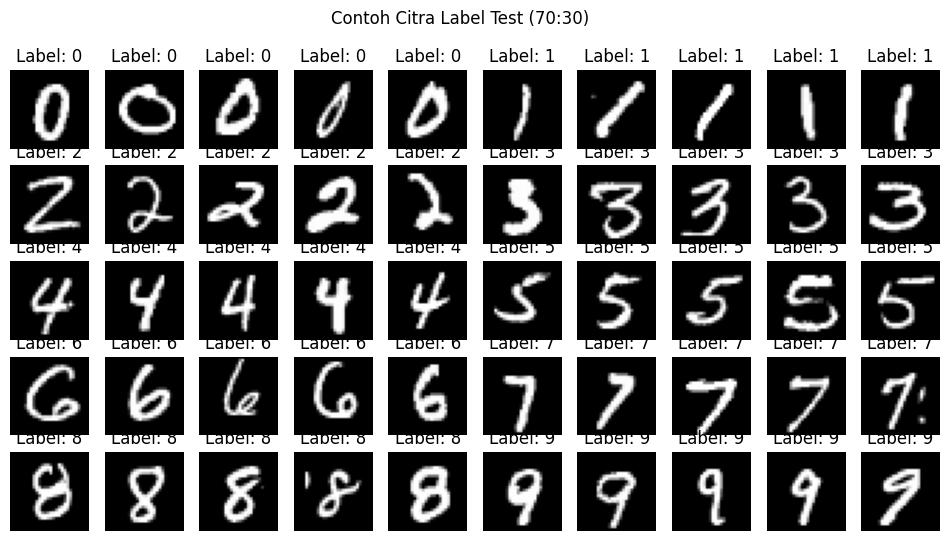

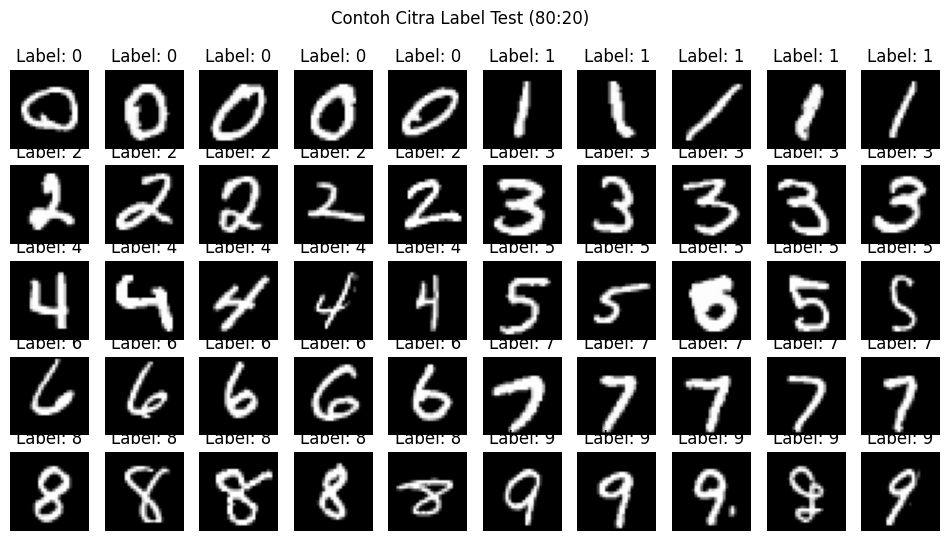

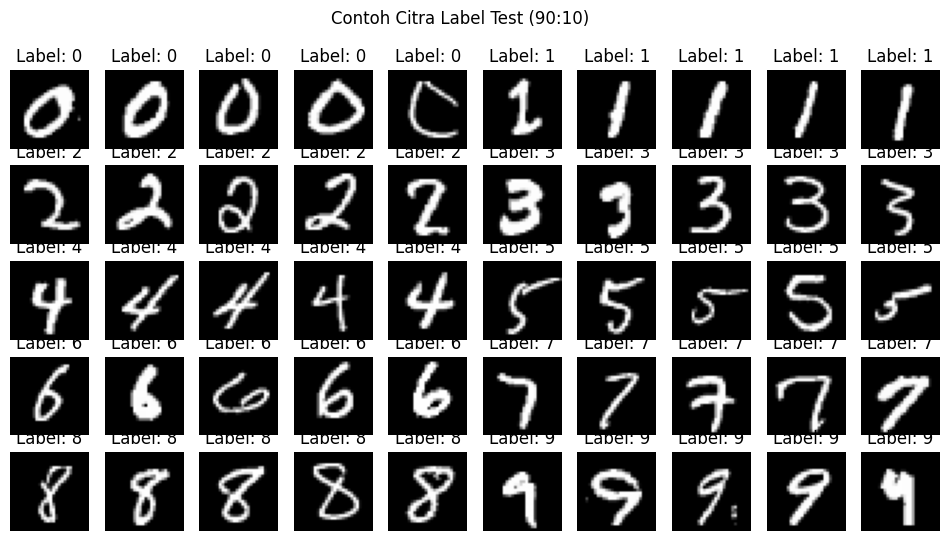

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menampilkan beberapa contoh citra dari label test
def display_sample_images(X, y, sample_size, title):
    # Ambil sampel citra dari label test
    sample_images = []
    sample_labels = []
    unique_labels = np.unique(y)
    for label in unique_labels:
        # Ambil sampel dari setiap label
        label_indices = np.where(y == label)[0]
        sample_indices = np.random.choice(label_indices, sample_size, replace=False)
        for index in sample_indices:
            sample_images.append(X[index])
            sample_labels.append(label)

    # Tampilkan sampel citra
    plt.figure(figsize=(12, 6))
    for i in range(len(sample_images)):
        plt.subplot(sample_size, len(unique_labels), i + 1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {sample_labels[i]}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Menampilkan contoh citra dari label test untuk rasio 70:30
display_sample_images(X_test_70, y_test_70, sample_size=5, title="Contoh Citra Label Test (70:30)")

# Menampilkan contoh citra dari label test untuk rasio 80:20
display_sample_images(X_test_80, y_test_80, sample_size=5, title="Contoh Citra Label Test (80:20)")

# Menampilkan contoh citra dari label test untuk rasio 90:10
display_sample_images(X_test_90, y_test_90, sample_size=5, title="Contoh Citra Label Test (90:10)")


In [ ]:
import matplotlib.pyplot as plt

def show_prediction(X, y_actual, y_pred, title):
    # Menampilkan citra dari data testing dengan label benar dan label prediksi
    plt.figure(figsize=(12, 6))
    for i in range(len(X)):
        plt.subplot(6, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap="gray")

        # Tentukan warna teks berdasarkan benar atau salah
        if y_actual[i] == y_pred[i]:
            text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
        else:
            text_color = 'red'  # Jika prediksi salah, teks berwarna merah

        plt.title(f"True: {y_actual[i]}\nPred: {y_pred[i]}", color=text_color)
        plt.axis("off")
    plt.tight_layout()
    plt.suptitle(title, y=1.02)  # Menambahkan jarak antara judul dan gambar
    plt.show()

# Contoh penggunaan fungsi show_prediction
# Menampilkan hasil prediksi dan memberikan judul
show_prediction(X_test_70[:30], y_test_70[:30], y_pred_test_70_svm[:30], "Hasil dari 70:30")

# Menampilkan hasil prediksi dan memberikan judul
show_prediction(X_test_80[:30], y_test_80[:30], y_pred_test_80_svm[:30], "Hasil dari 80:20")

# Menampilkan hasil prediksi dan memberikan judul
show_prediction(X_test_90[:30], y_test_90[:30], y_pred_test_90_svm[:30], "Hasil dari 90:10")

# Menampilkan semua plot
plt.show()


dapat dilihat bahwa hasil antara rasio 70:30, 80:20, 90:10 berbeda

# **No 8**
Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

**Metode SVM lebih unggul daripada Naive Bayes.**

Tingkat akurasi dengan Naive Bayes (Test) :
- 70:30 = 0.8257142857142857
- 80:20 = 0.829
- 90:10 = 0.8294285714285714

Tingkat akurasi dengan SVM (Test) :
- 70:30 = 0.9762857142857143
- 80:20 = 0.9764285714285714
- 90:10 = 0.975
